In [1]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("aggregated.xlsx", "Main")

In [3]:
data

,GMDNAME,KTNAME,LAT_CNTR,LONG_CNTR,HEIGHT_CNTR,BEVDICHTE_SQKM_ 2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_ 2019,ALTERSVERTEILUNG_ANTEIL_20_64_ 2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019,...,WAEHLERANTEIL_GPS_2019,WAEHLERANTEIL_KLEINERECHTSPARTEIN_2019,AVG_INCOME_PRO_STEUERPFLPERSON,STEUERBARES_EINKOMMEN_GEMEINDE,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,Anzahl Filialen Coop,Anzahl Filialen Migros,Anzahl Filialen Denner,Anzahl Filialen Spar
0,Aadorf,Thurgau,47.489522,8.908937,590.048732,453.711133,15.839505,20.404554,60.362551,19.232895,...,9.589132,1.981445,68464.601333,277.3501,6014.000001,9,1,1,1,0
1,Aarau,Aargau,47.390236,8.045227,436.236994,1764.424635,20.938777,17.383916,64.414642,18.201442,...,14.680225,0.629738,72516.345149,763.0895,10976.000000,51,3,4,2,0
2,Aarberg,Bern,47.045418,7.278088,500.020013,584.110971,12.888601,19.624352,59.045769,21.329879,...,10.256268,1.811403,64687.799155,137.8497,2807.999999,11,1,0,1,0
3,Aarburg,Aargau,47.319850,7.900250,445.406223,1899.319728,44.138013,20.475167,65.222063,14.302770,...,10.519265,1.723182,60540.820872,190.2798,4758.000002,10,0,1,1,0
4,Aarwangen,Bern,47.240244,7.770130,485.533291,466.666667,15.909091,20.541126,60.129870,19.329004,...,9.006610,2.048808,65314.566285,119.7216,2699.000000,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,Zuzwil (SG),St. Gallen,47.475095,9.110215,581.873056,534.225195,12.583472,21.222871,60.976628,17.800501,...,7.861225,1.057856,80012.956811,168.5873,3202.000000,9,1,2,1,0
2138,Zweisimmen,Bern,46.554365,7.372137,997.280874,41.643836,13.190789,16.973684,56.842105,26.184211,...,5.879006,2.809688,58806.567631,75.2136,1793.000000,29,1,1,1,0
2139,Zwieselberg,Bern,46.708072,7.616483,694.021029,133.739837,4.863222,27.051672,56.534954,16.413374,...,13.422588,6.385170,62723.214286,7.0250,178.000000,1,0,0,0,0
2140,Zwingen,Basel-Landschaft,47.435861,7.530089,395.002838,532.104122,24.419079,20.423971,64.329393,15.246637,...,8.396484,NaN,67304.796663,64.5453,1612.000000,7,0,1,0,1


In [4]:
data.columns

Index(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR',
       'BEVDICHTE_SQKM_ 2019', 'AUSLAENDER_ANTEIL_2019',
       'ALTERSVERTEILUNG_ANTEIL_0_19_ 2019',
       'ALTERSVERTEILUNG_ANTEIL_20_64_ 2019',
       'ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019', 'PRIVATHAUSHALTE_2019',
       'DURCHSCH_HAUSHALTSGROESSE_2019', 'GESAMTFLAECHE_ SQKM_2016',
       'LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004/09', 'WALD_GEHOELZE_ANTEIL_2004/09',
       'UNPRODUKTIVE_FLAECHE_ANTEIL_2004/09', 'BESCHAEFTIGTE_TOTAL_2018',
       'BESCHAEFTIGTE_ERSTERSEKTOR_2018', 'BESCHAEFTIGTE_ZWEITERRSEKTOR_2018',
       'BESCHAEFTIGTE_DRITTERSEKTOR_2018', 'ARBEITSSTAETTEN_TOTAL_2018',
       'ARBEITSSTAETTEN_ERSTERSEKTOR_2018',
       'ARBEITSSTAETTEN_ZWEITERSEKTOR_2018',
       'ARBEITSSTAETTEN_DRITTERSEKTOR_2018', 'NEUWOHNUNGEN_PRO_1000_2018',
       'SOZAILHILFEQUOTE_2019', 'WAEHLERANTEIL_FDP_2019',
       'WAEHLERANTEIL_CVP_2019', 'WAEHLERANTEIL_SP_2019',
       'WAEHLERANTEIL_SVP_2019', 'WAEHLERANTEIL_EVP_CSP_20

In [5]:
data.drop(["GMDNAME", "KTNAME", "LAT_CNTR", "LONG_CNTR", "HEIGHT_CNTR"], axis=1, inplace=True) #dropping standard info
data.drop(["WAEHLERANTEIL_FDP_2019","WAEHLERANTEIL_CVP_2019", "WAEHLERANTEIL_EVP_CSP_2019", "WAEHLERANTEIL_GLP_2019", "WAEHLERANTEIL_BDP_2019", "WAEHLERANTEIL_PDA_SOL_2019", "WAEHLERANTEIL_GPS_2019", "WAEHLERANTEIL_KLEINERECHTSPARTEIN_2019"], axis=1, inplace=True) #dropping most political features, only keeping largest 2 parties (left & right)
data.drop(["BESCHAEFTIGTE_TOTAL_2018", "ARBEITSSTAETTEN_TOTAL_2018"], axis=1, inplace=True) # Redundant


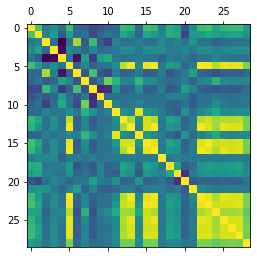

In [6]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [7]:
corr = data.corr()
corr[abs(corr)>=0.7].unstack().dropna().drop_duplicates().sort_values(ascending=False)

BEVDICHTE_SQKM_ 2019                BEVDICHTE_SQKM_ 2019                  1.000000
BESCHAEFTIGTE_DRITTERSEKTOR_2018    ARBEITSSTAETTEN_DRITTERSEKTOR_2018    0.986175
PRIVATHAUSHALTE_2019                STEUERBARES_EINKOMMEN_GEMEINDE        0.983253
                                    ARBEITSSTAETTEN_DRITTERSEKTOR_2018    0.981637
ARBEITSSTAETTEN_DRITTERSEKTOR_2018  STEUERBARES_EINKOMMEN_GEMEINDE        0.979896
ARBEITSSTAETTEN_ZWEITERSEKTOR_2018  ANZAHL_FAHRZEUGE                      0.977908
PRIVATHAUSHALTE_2019                BESCHAEFTIGTE_DRITTERSEKTOR_2018      0.972294
BESCHAEFTIGTE_DRITTERSEKTOR_2018    STEUERBARES_EINKOMMEN_GEMEINDE        0.968849
PRIVATHAUSHALTE_2019                ANZAHL_FAHRZEUGE                      0.968630
                                    ARBEITSSTAETTEN_ZWEITERSEKTOR_2018    0.952045
STEUERBARES_EINKOMMEN_GEMEINDE      ANZAHL_FAHRZEUGE                      0.950829
PRIVATHAUSHALTE_2019                Anzahl Filialen Coop                  0.949306
BESC

In [8]:
data.drop(["ARBEITSSTAETTEN_ERSTERSEKTOR_2018", "ARBEITSSTAETTEN_ZWEITERSEKTOR_2018", "ARBEITSSTAETTEN_DRITTERSEKTOR_2018"], axis=1, inplace=True) # Multicolinearity
data.drop(["STEUERBARES_EINKOMMEN_GEMEINDE"], axis=1, inplace=True) # High correlation with Privathaushalte
data.drop(["DURCHSCH_HAUSHALTSGROESSE_2019"], axis=1, inplace=True) # Same infomration in combination with anzahl haushalte as area & bevölkerungsdichte

In [9]:
data.isna().sum()

BEVDICHTE_SQKM_ 2019                       0
AUSLAENDER_ANTEIL_2019                     0
ALTERSVERTEILUNG_ANTEIL_0_19_ 2019         0
ALTERSVERTEILUNG_ANTEIL_20_64_ 2019        0
ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019       0
PRIVATHAUSHALTE_2019                       0
GESAMTFLAECHE_ SQKM_2016                   0
LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004/09      0
WALD_GEHOELZE_ANTEIL_2004/09               0
UNPRODUKTIVE_FLAECHE_ANTEIL_2004/09        0
BESCHAEFTIGTE_ERSTERSEKTOR_2018           33
BESCHAEFTIGTE_ZWEITERRSEKTOR_2018         57
BESCHAEFTIGTE_DRITTERSEKTOR_2018           6
NEUWOHNUNGEN_PRO_1000_2018                 0
SOZAILHILFEQUOTE_2019                    472
WAEHLERANTEIL_SP_2019                     36
WAEHLERANTEIL_SVP_2019                     8
AVG_INCOME_PRO_STEUERPFLPERSON            35
ANZAHL_FAHRZEUGE                          91
ANZAHL_HALTESTELLEN_OV                     0
Anzahl Filialen Coop                       0
Anzahl Filialen Migros                     0
Anzahl Fil

In [10]:
data[data.isnull().any(axis=1)]

,BEVDICHTE_SQKM_ 2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_ 2019,ALTERSVERTEILUNG_ANTEIL_20_64_ 2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_ SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004/09,WALD_GEHOELZE_ANTEIL_2004/09,UNPRODUKTIVE_FLAECHE_ANTEIL_2004/09,...,SOZAILHILFEQUOTE_2019,WAEHLERANTEIL_SP_2019,WAEHLERANTEIL_SVP_2019,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,Anzahl Filialen Coop,Anzahl Filialen Migros,Anzahl Filialen Denner,Anzahl Filialen Spar
5,232.289157,12.655602,24.066390,64.626556,11.307054,377,4.15,69.565217,22.222222,0.000000,...,NaN,8.094889,44.314013,72298.387097,634.000000,4,0,0,0,1
6,138.205128,24.304267,22.820037,63.265306,13.914657,217,3.90,68.461538,13.846154,0.769231,...,NaN,21.446934,22.034521,90040.254237,558.000000,3,0,0,0,0
10,106.079027,10.601719,21.203438,60.028653,18.767908,274,6.58,63.897281,22.658610,2.567976,...,NaN,6.097167,56.458042,68920.955882,472.000000,2,0,0,0,0
17,318.511450,20.011983,21.629718,61.054524,17.315758,717,5.24,57.389635,33.205374,0.191939,...,NaN,9.133739,35.511651,110664.499121,960.000000,2,0,0,0,0
24,94.509804,10.096819,15.076072,65.698479,19.225450,304,7.65,17.082786,32.851511,45.729304,...,NaN,7.669519,20.934826,54326.229508,501.999999,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,17.890257,32.540357,23.194562,54.885302,21.920136,528,65.79,46.442176,9.599269,42.023465,...,NaN,15.336014,31.591040,55943.323864,729.000000,12,1,0,0,0
2134,669.478528,38.625430,17.021764,58.808706,24.169530,1976,6.52,25.343511,42.442748,4.427481,...,2.9,17.936686,31.055449,NaN,NaN,42,1,1,1,0
2136,164.265130,2.807018,22.631579,54.210526,23.157895,235,3.47,65.606936,26.878613,0.289017,...,NaN,13.970131,29.387057,76573.437500,342.000000,2,0,0,0,0
2139,133.739837,4.863222,27.051672,56.534954,16.413374,125,2.46,62.962963,26.337449,0.823045,...,NaN,9.921044,40.370752,62723.214286,178.000000,1,0,0,0,0


In [11]:
data

,BEVDICHTE_SQKM_ 2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_ 2019,ALTERSVERTEILUNG_ANTEIL_20_64_ 2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_ SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004/09,WALD_GEHOELZE_ANTEIL_2004/09,UNPRODUKTIVE_FLAECHE_ANTEIL_2004/09,...,SOZAILHILFEQUOTE_2019,WAEHLERANTEIL_SP_2019,WAEHLERANTEIL_SVP_2019,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,Anzahl Filialen Coop,Anzahl Filialen Migros,Anzahl Filialen Denner,Anzahl Filialen Spar
0,453.711133,15.839505,20.404554,60.362551,19.232895,3908,19.94,53.386854,27.997993,0.501756,...,1.07,10.728960,37.415507,68464.601333,6014.000001,9,1,1,1,0
1,1764.424635,20.938777,17.383916,64.414642,18.201442,10591,12.34,11.407767,32.281553,7.119741,...,3.58,26.428113,16.347677,72516.345149,10976.000000,51,3,4,2,0
2,584.110971,12.888601,19.624352,59.045769,21.329879,2146,7.93,44.206549,29.722922,2.644836,...,2.74,14.825120,33.668160,64687.799155,2807.999999,11,1,0,1,0
3,1899.319728,44.138013,20.475167,65.222063,14.302770,3735,4.41,19.318182,31.136364,3.863636,...,4.92,20.964612,34.902522,60540.820872,4758.000002,10,0,1,1,0
4,466.666667,15.909091,20.541126,60.129870,19.329004,1962,9.90,45.795339,35.967579,3.242148,...,3.92,13.289057,38.645406,65314.566285,2699.000000,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,534.225195,12.583472,21.222871,60.976628,17.800501,1969,8.97,54.849498,23.745819,1.449275,...,0.61,9.440489,34.137170,80012.956811,3202.000000,9,1,2,1,0
2138,41.643836,13.190789,16.973684,56.842105,26.184211,1385,73.00,54.853705,33.716161,8.025704,...,1.33,9.453356,50.826902,58806.567631,1793.000000,29,1,1,1,0
2139,133.739837,4.863222,27.051672,56.534954,16.413374,125,2.46,62.962963,26.337449,0.823045,...,NaN,9.921044,40.370752,62723.214286,178.000000,1,0,0,0,0
2140,532.104122,24.419079,20.423971,64.329393,15.246637,1057,4.61,33.043478,38.478261,2.826087,...,3.58,19.854501,33.404062,67304.796663,1612.000000,7,0,1,0,1


In [12]:
from sklearn.impute import KNNImputer

In [13]:
imputer = KNNImputer()
imputer.fit(data)
data_imputed = imputer.transform(data)
names=imputer.feature_names_in_
data_imputed=pd.DataFrame(data_imputed, columns=names)

In [14]:
data_imputed

,BEVDICHTE_SQKM_ 2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_ 2019,ALTERSVERTEILUNG_ANTEIL_20_64_ 2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_ SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004/09,WALD_GEHOELZE_ANTEIL_2004/09,UNPRODUKTIVE_FLAECHE_ANTEIL_2004/09,...,SOZAILHILFEQUOTE_2019,WAEHLERANTEIL_SP_2019,WAEHLERANTEIL_SVP_2019,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,Anzahl Filialen Coop,Anzahl Filialen Migros,Anzahl Filialen Denner,Anzahl Filialen Spar
0,453.711133,15.839505,20.404554,60.362551,19.232895,3908.0,19.94,53.386854,27.997993,0.501756,...,1.070,10.728960,37.415507,68464.601333,6014.000001,9.0,1.0,1.0,1.0,0.0
1,1764.424635,20.938777,17.383916,64.414642,18.201442,10591.0,12.34,11.407767,32.281553,7.119741,...,3.580,26.428113,16.347677,72516.345149,10976.000000,51.0,3.0,4.0,2.0,0.0
2,584.110971,12.888601,19.624352,59.045769,21.329879,2146.0,7.93,44.206549,29.722922,2.644836,...,2.740,14.825120,33.668160,64687.799155,2807.999999,11.0,1.0,0.0,1.0,0.0
3,1899.319728,44.138013,20.475167,65.222063,14.302770,3735.0,4.41,19.318182,31.136364,3.863636,...,4.920,20.964612,34.902522,60540.820872,4758.000002,10.0,0.0,1.0,1.0,0.0
4,466.666667,15.909091,20.541126,60.129870,19.329004,1962.0,9.90,45.795339,35.967579,3.242148,...,3.920,13.289057,38.645406,65314.566285,2699.000000,4.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,534.225195,12.583472,21.222871,60.976628,17.800501,1969.0,8.97,54.849498,23.745819,1.449275,...,0.610,9.440489,34.137170,80012.956811,3202.000000,9.0,1.0,2.0,1.0,0.0
2138,41.643836,13.190789,16.973684,56.842105,26.184211,1385.0,73.00,54.853705,33.716161,8.025704,...,1.330,9.453356,50.826902,58806.567631,1793.000000,29.0,1.0,1.0,1.0,0.0
2139,133.739837,4.863222,27.051672,56.534954,16.413374,125.0,2.46,62.962963,26.337449,0.823045,...,3.164,9.921044,40.370752,62723.214286,178.000000,1.0,0.0,0.0,0.0,0.0
2140,532.104122,24.419079,20.423971,64.329393,15.246637,1057.0,4.61,33.043478,38.478261,2.826087,...,3.580,19.854501,33.404062,67304.796663,1612.000000,7.0,0.0,1.0,0.0,1.0


## Migros

In [15]:
X = data_imputed.drop(["Anzahl Filialen Migros"], axis=1)
y = data_imputed["Anzahl Filialen Migros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [16]:
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()

xgbrparams = {'objective':['reg:squarederror'],
          'n_estimators': [100, 250, 500, 1000],
          'max_depth': [5, 7, 10],
          'eta': [0.05, 0.1, 0.15],
          'subsample': [0.6],
          'colsample_bytree': [0.7],
          }

xgbrGsCvModel = GridSearchCV(model, param_grid=xgbrparams)
xgbrGsCvModel.fit(X_train, y_train)
xgbrGsCvModel.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.05,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.6}

In [17]:
model.fit(X_train, y_train)

[23:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [18]:
predictions = xgbrGsCvModel.predict(X_test).round()

In [19]:
predictions

array([ 0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  5.,  0.,  1.,  0.,  0.,
        1.,  2., -0.,  0.,  0.,  1.,  0.,  1.,  0.,  0., -0., -0.,  0.,
       -0.,  0.,  1.,  0., -0., -0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
       -0.,  1.,  1.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  4.,  0.,  4.,
       -0.,  1., -0.,  1.,  2., -0.,  1.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  3.,  0.,  0., -0., -0.,  1., -0.,  0.,  0.,
        0., -0.,  0.,  0., -0.,  4.,  0.,  0., -0.,  0.,  0.,  1.,  0.,
        0.,  2.,  0.,  3.,  0.,  0., -0.,  1., -0.,  1., -0.,  2.,  0.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
       -0.,  0.,  1.,  1., -0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0., -0.,  0.,  0.,  2.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  1.,
        2.,  0.,  0.,  1.,  2., 19., -0., -0., -0.,  0.,  2., -0.,  0.,
        8.,  0., -0.,  0.,  0.,  1., -0.,  0.,  0.,  0.,  0., -0.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0., -0.,  0., -0

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test, y_pred = predictions)
r2

0.6166207529843895

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = y_test, y_pred = predictions)
mse

0.7767441860465116

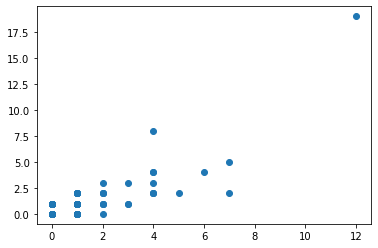

In [22]:
import matplotlib

matplotlib.pyplot.scatter(y=predictions, x=y_test)

<Figure size 1440x1440 with 0 Axes>

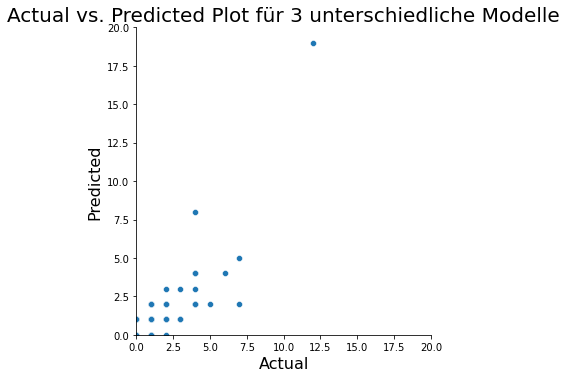

In [23]:
import seaborn as sns

plt.figure(figsize=(20,20))
ax = sns.relplot(x = y_test, y = predictions, label="XGB")
plt.ylim(0, 20)
plt.xlim(0,20)
plt.ylabel("Predicted", fontsize=16)
plt.xlabel("Actual", fontsize=16)
plt.title("Actual vs. Predicted Plot für 3 unterschiedliche Modelle", fontsize=20)
plt.show()

## Feature Importance

In [24]:
def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":xgbrGsCvModel.best_estimator_.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

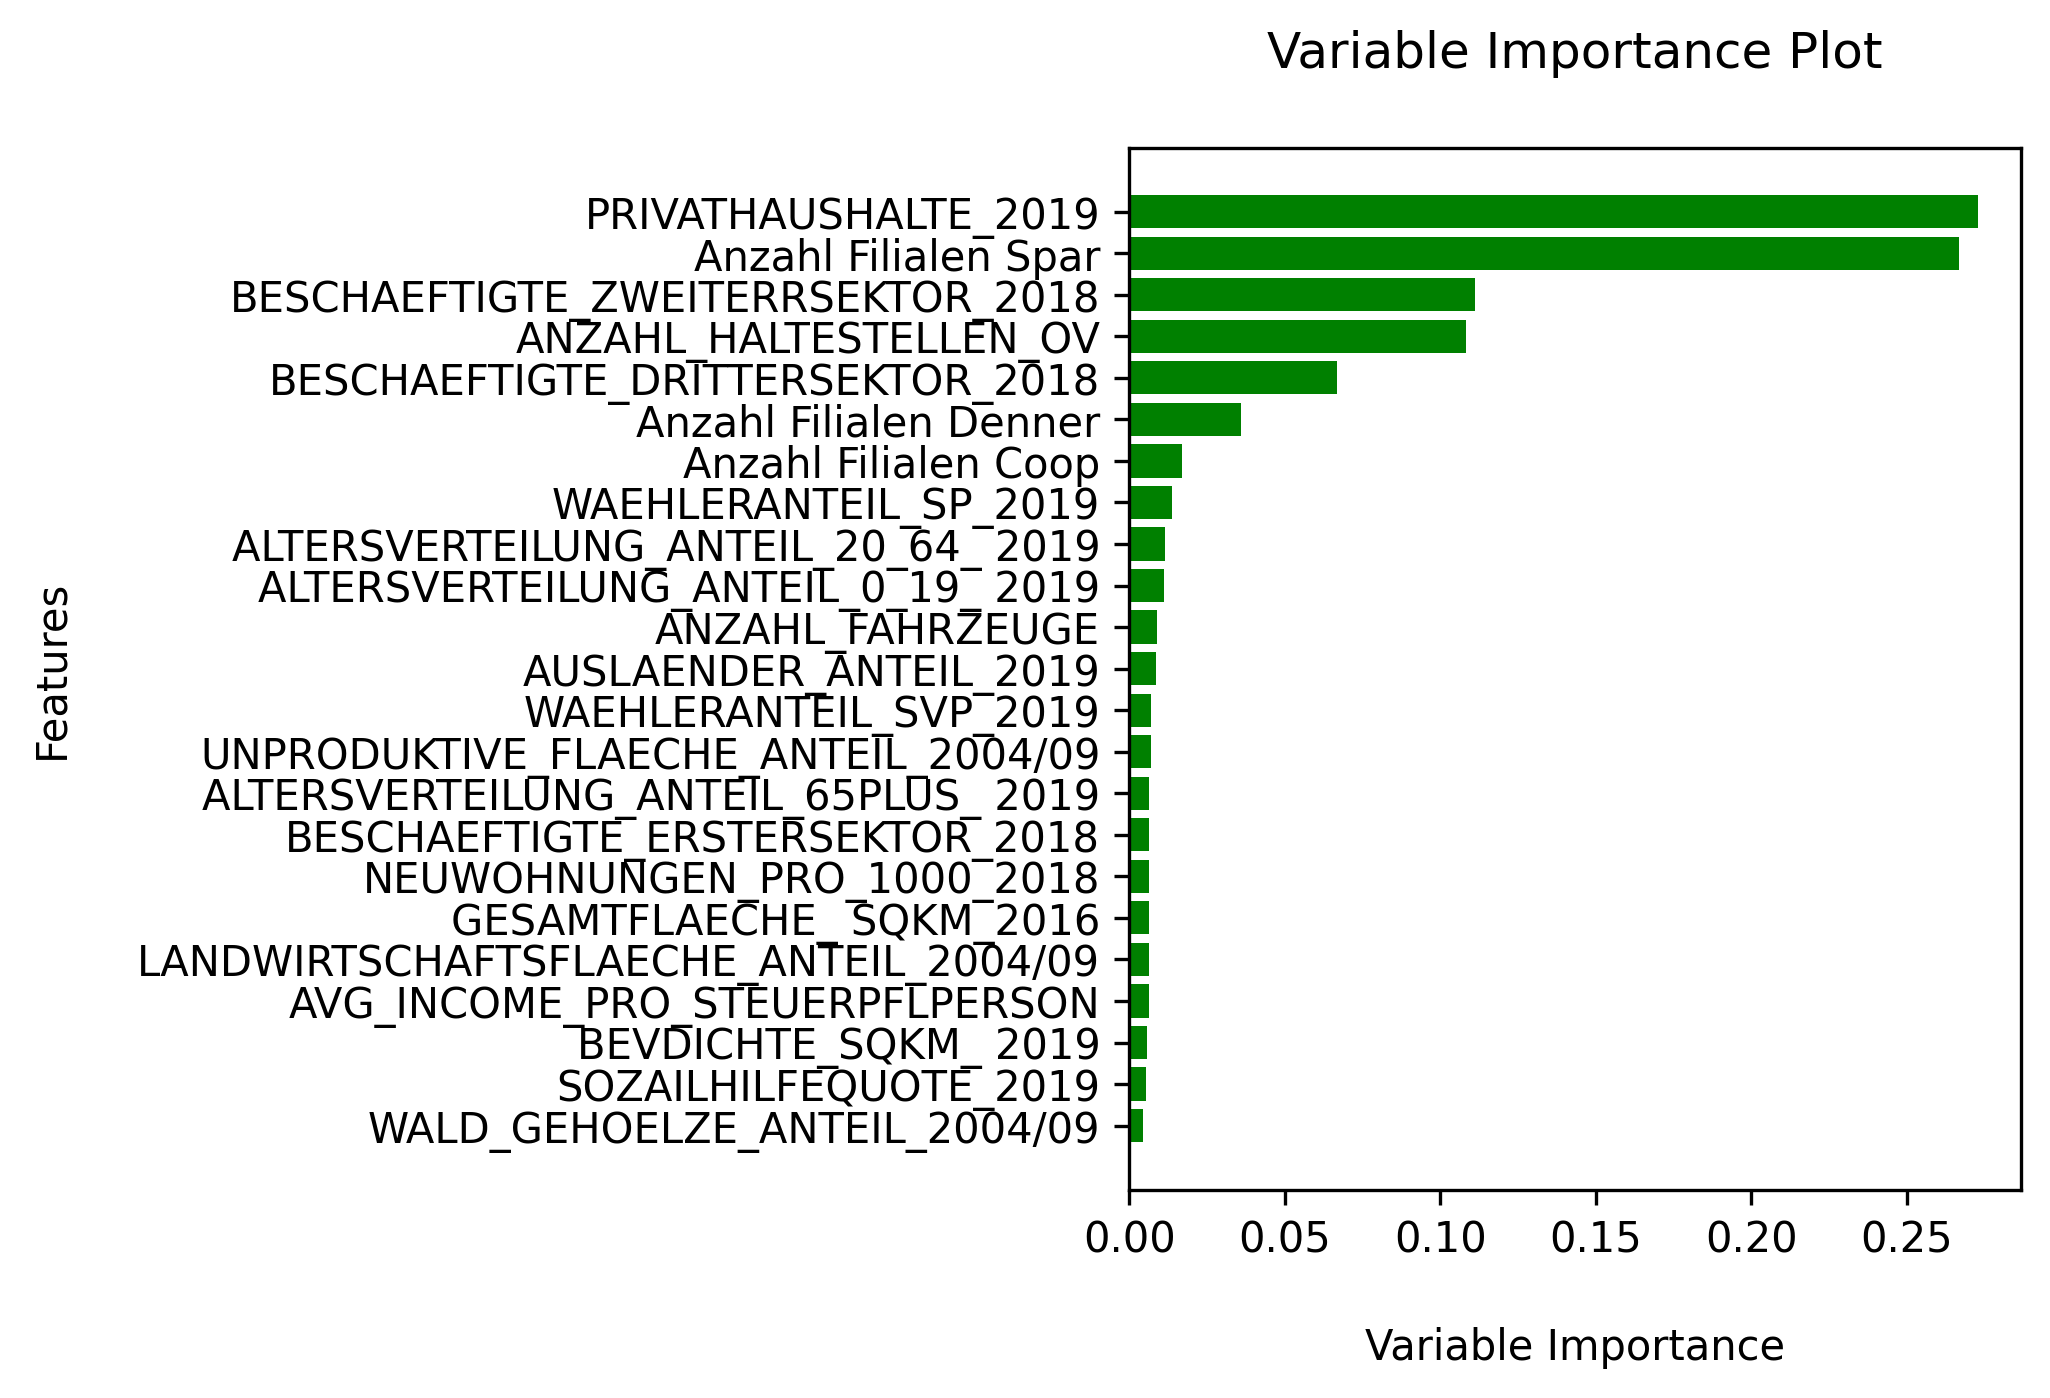

In [25]:
plot_variable_importance(xgbrGsCvModel, X_train)

## Without \# Stores as feature

In [26]:
X = data_imputed.drop(["Anzahl Filialen Migros", "Anzahl Filialen Coop", "Anzahl Filialen Spar", "Anzahl Filialen Denner"], axis=1)
y = data_imputed["Anzahl Filialen Migros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [27]:
model = XGBRegressor()

In [28]:
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()

xgbrparams = {'objective':['reg:squarederror'],
          'n_estimators': [100, 250, 500, 1000],
          'max_depth': [5, 7, 10],
          'eta': [0.05, 0.1, 0.15],
          'subsample': [0.6],
          'colsample_bytree': [0.7],
          }

xgbrGsCvModel = GridSearchCV(model, param_grid=xgbrparams)
xgbrGsCvModel.fit(X_train, y_train)
xgbrGsCvModel.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.6}

In [29]:
predictions = xgbrGsCvModel.predict(X_test).round()

In [30]:
r2 = r2_score(y_true = y_test, y_pred = predictions)
r2

0.6877869605142334

In [31]:
mse = mean_squared_error(y_true = y_test, y_pred = predictions)
mse

0.6325581395348837

<Figure size 1440x1440 with 0 Axes>

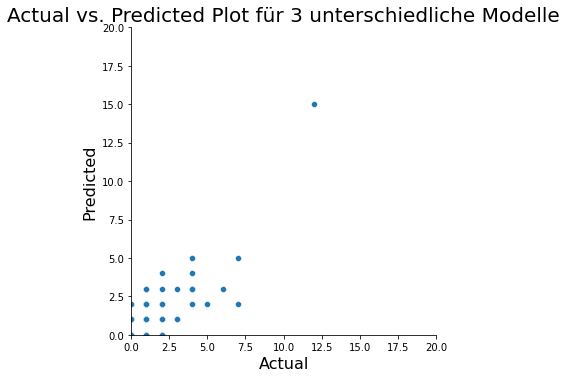

In [32]:
import seaborn as sns

plt.figure(figsize=(20,20))
ax = sns.relplot(x = y_test, y = predictions, label="XGB")
plt.ylim(0, 20)
plt.xlim(0,20)
plt.ylabel("Predicted", fontsize=16)
plt.xlabel("Actual", fontsize=16)
plt.title("Actual vs. Predicted Plot für 3 unterschiedliche Modelle", fontsize=20)
plt.show()

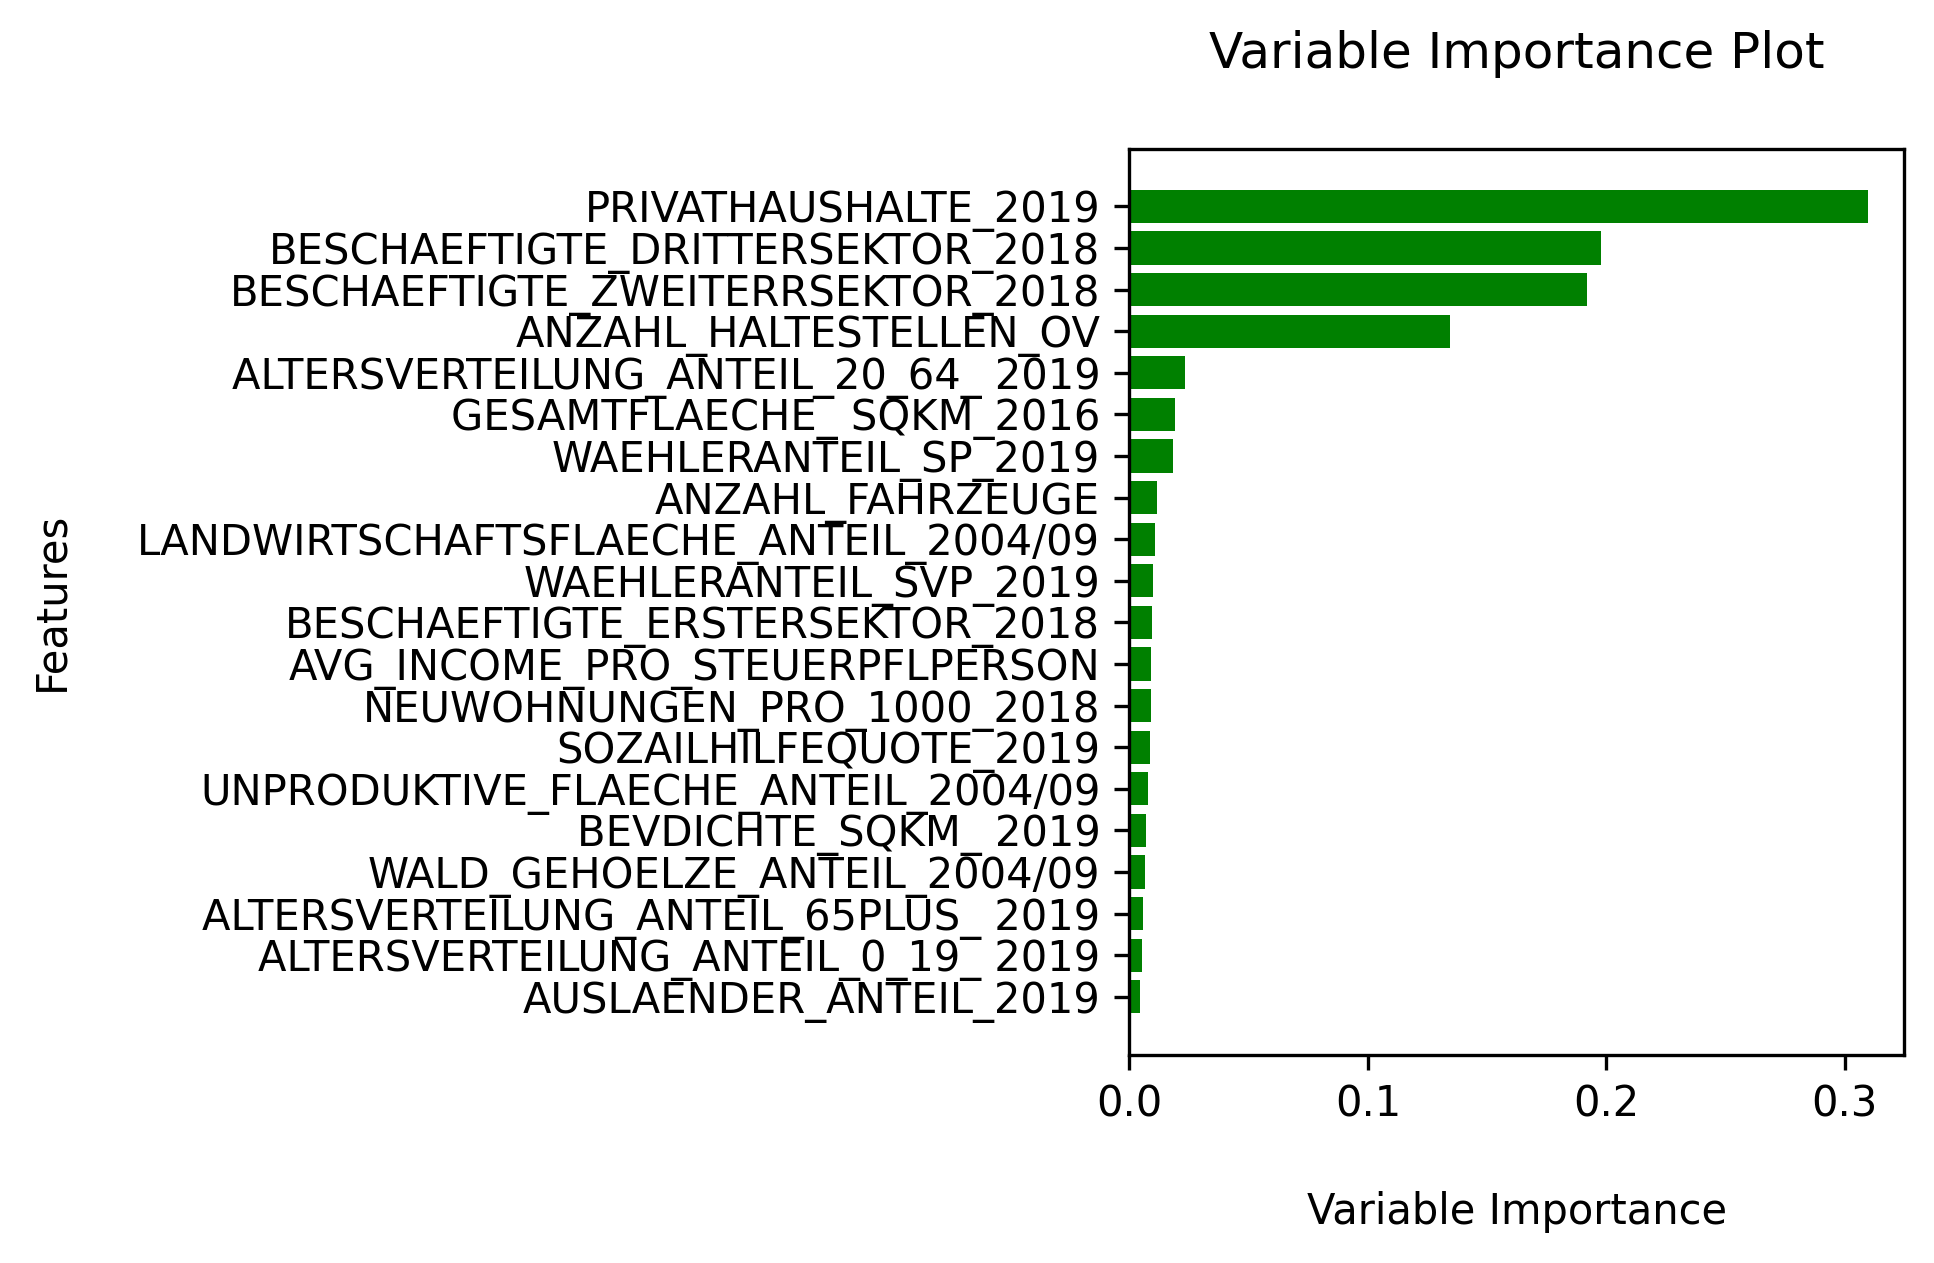

In [33]:
plot_variable_importance(xgbrGsCvModel, X_train)